데이터분석제안서

2조 -
202104256 윤유빈
202104263 윤혜정
202104277 이성민

* 개요

  경찰청에서 제공한 '경찰청_범죄 발생 지역별 통계' 데이터를 기반으로 범죄 발생의 추이를 분석하고, 특정 유형의 범죄를 감소시키는 방법을 탐색하는 것이 이번 데이터수집 및 분석의 목적입니다.

  먼저, 연도별로 범죄 유형의 발생량을 살펴보고 변화에 대한 추이를 분석할 것입니다. 이 과정에서 특이한 추이를 보이는 범죄 유형을 발견한 후에는 해당 유형과 관련된 다양한 요인들을 예측하고 상관관계를 분석할 예정입니다. 예측할 수 있는 요인에는 예를 들어 사회적 요인, 경제적 요인, 경찰 활동 등이 있습니다.

* 데이터수집 

 공공데이터포털에서 분석의 목적에 맞는 '경찰청_범죄 발생 지역별 통계' 데이터를 수집하였습니다. 추이를 분석하기 위해 연도별로 2020년,2021년,2022년도의 데이터를 수집하였습니다. 

 이 데이터는 경찰청에서 제공한 데이터로, 전국의 지역별 범죄율을 수집한 것입니다.  
전국 경찰관서에 고소, 고발, 인지 등으로 형사입건된 사건의 발생, 검거, 피의자에 대한 지역별 분석 현황이 포함되어 있습니다. 
범죄대분류, 범죄중분류, 서울, 부산, 대구, 인천, 광주, 대전 울산, 세종, 경기도 지역으로 구분하여 발생 건수를 제공합니다.

 데이터는 주요 도시와 지방 지역을 포함하며, 범죄 유형은 살인, 강도, 절도, 폭력, 교통범죄 등을 포함합니다. 
각 행은 범죄대분류, 중분류로 구분되어 있고, 각 열은 지역별로 구분되어 있습니다.
지역별로 발생 건수를 제공하여, 지역별 통계를 세부적으로 파악할 수 있는 것이 이 데이터의 특징입니다. 





In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data_2022 = pd.read_csv("경찰청_범죄 발생 지역별 통계_20221231.csv", encoding='cp949')

In [25]:
data_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 89 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   범죄대분류   38 non-null     object
 1   범죄중분류   38 non-null     object
 2   서울      38 non-null     int64 
 3   부산      38 non-null     int64 
 4   대구      38 non-null     int64 
 5   인천      38 non-null     int64 
 6   광주      38 non-null     int64 
 7   대전      38 non-null     int64 
 8   울산      38 non-null     int64 
 9   세종      38 non-null     int64 
 10  경기 고양   38 non-null     int64 
 11  경기 과천   38 non-null     int64 
 12  경기 광명   38 non-null     int64 
 13  경기 광주   38 non-null     int64 
 14  경기 구리   38 non-null     int64 
 15  경기 군포   38 non-null     int64 
 16  경기 김포   38 non-null     int64 
 17  경기 남양주  38 non-null     int64 
 18  경기 동두천  38 non-null     int64 
 19  경기 부천   38 non-null     int64 
 20  경기 성남   38 non-null     int64 
 21  경기 수원   38 non-null     int64 
 22  경기 시흥   38 non-null     int6

In [26]:
data_2022.head()

,범죄대분류,범죄중분류,서울,부산,대구,인천,광주,대전,울산,세종,...,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외
0,강력범죄,살인기수,35,29,16,14,1,6,8,2,...,1,2,1,2,5,0,1,3,4,19
1,강력범죄,살인미수등,68,24,15,38,2,11,7,3,...,2,0,3,1,11,1,4,4,1,43
2,강력범죄,강도,118,43,31,30,10,17,10,2,...,1,1,0,0,12,5,1,4,1,28
3,강력범죄,강간,1200,347,215,340,152,200,112,26,...,6,12,36,41,77,19,17,78,18,375
4,강력범죄,유사강간,219,83,43,61,32,34,14,6,...,0,2,3,2,14,4,8,13,3,52


In [27]:
#결측치 확인 결과: 데이터 프레임에 결측치 없음.
null_counts = data_2022.isnull().sum()
print(null_counts)

범죄대분류     0
범죄중분류     0
서울        0
부산        0
대구        0
         ..
경남 통영     0
제주 서귀포    0
제주 제주     0
기타도시      0
도시이외      0
Length: 89, dtype: int64


In [28]:
# 전국의 범죄 분류별 발생수를 알아보기 위해 지역의 범죄발생수를 더해서 새로운 열 생성
data_2022['전국'] = data_2022.iloc[:, 2:].sum(axis=1)
data_2022.head()

,범죄대분류,범죄중분류,서울,부산,대구,인천,광주,대전,울산,세종,...,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외,전국
0,강력범죄,살인기수,35,29,16,14,1,6,8,2,...,2,1,2,5,0,1,3,4,19,275
1,강력범죄,살인미수등,68,24,15,38,2,11,7,3,...,0,3,1,11,1,4,4,1,43,427
2,강력범죄,강도,118,43,31,30,10,17,10,2,...,1,0,0,12,5,1,4,1,28,516
3,강력범죄,강간,1200,347,215,340,152,200,112,26,...,12,36,41,77,19,17,78,18,375,5467
4,강력범죄,유사강간,219,83,43,61,32,34,14,6,...,2,3,2,14,4,8,13,3,52,947


In [32]:
# 한글 깨져서 가져온 코드
import os

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'
os.system('rm ~/.cache/matplotlib -rf')

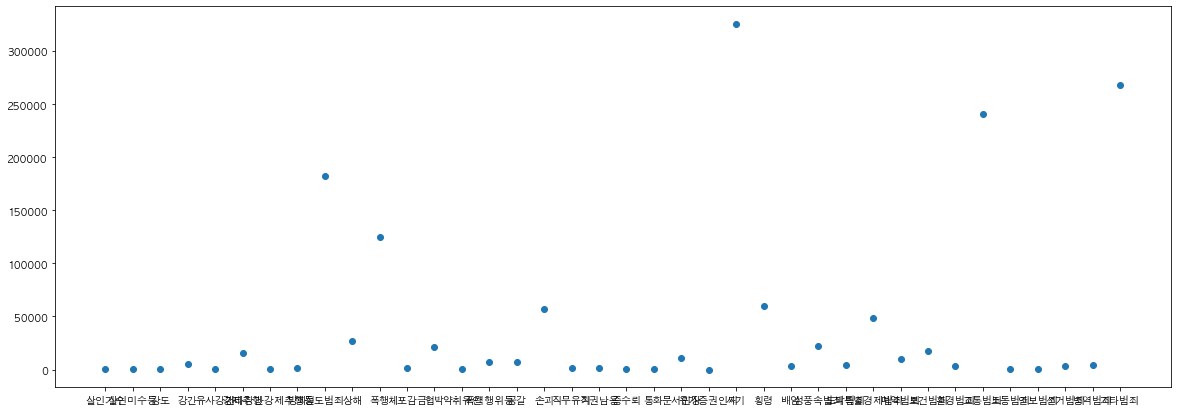

In [33]:
# 가장 많이 발생한 범죄 종류 시각화하기 위해 산점도로 표현 
fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(data_2022.iloc[:, 1], data_2022['전국'])
plt.show()

범죄중분류(row)가 많아 한 눈에 데이터를 파악하기 힘들어 발생 수가 가장 많은 범죄 종류 5가지 추출

In [34]:
top_5_2022 = data_2022.nlargest(5, '전국')
top_5_2022 = top_5_2022.iloc[:, 1:]
print(top_5_2022)

   범죄중분류     서울     부산     대구     인천    광주     대전    울산    세종  경기 고양  ...  \
23    사기  52034  26847  14836  16652  8249  11734  5615  1528   5201  ...   
37  기타범죄  48367  24440   8821  17865  5177   5758  4016  1009   3852  ...   
32  교통범죄  32013  12176  12610  11926  7827   6389  5754  1031   3967  ...   
8   절도범죄  37594  13699   9792   8895  5204   6034  3283  1110   2484  ...   
10    폭행  26509   8474   5629   8040  3430   4166  2574   400   2414  ...   

    경남 사천  경남 양산  경남 진주  경남 창원  경남 통영  제주 서귀포  제주 제주   기타도시   도시이외      전국  
23    625   2055   2583   7204   1193    1599   3996  25191  16295  325848  
37    527   1348   1286   5339   3261    1455   3575   8013  23631  267964  
32    751   1573   1376   4023    825    1382   3052    323  20094  241029  
8     342   1158   2114   3426    387     886   2247     43   9454  182270  
10    246    803    800   2289    334     625   2169     53   5704  125217  

[5 rows x 89 columns]


<AxesSubplot:xlabel='범죄중분류'>

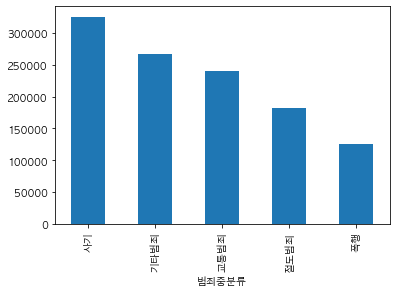

In [35]:
top_5_2022 = top_5_2022.set_index(top_5_2022.iloc[:, 0])
top_5_2022['전국'].plot(kind='bar')

데이터를 비교하기 위해 2021년 범죄 발생 지역별 통계와 2020년 범죄 발생 지역별 통계 데이터 분석도 같이 진행하였다.

In [38]:
data_2020 = pd.read_csv("경찰청_범죄 발생 지역별 통계_20201231.csv", encoding='cp949')
data_2021 = pd.read_csv("경찰청_범죄 발생 지역별 통계_20211231.csv", encoding='cp949')

In [39]:
data_2020.head()

,범죄대분류,범죄중분류,서울,부산,대구,인천,광주,대전,울산,세종,...,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외
0,강력범죄,살인기수,50,21,15,12,7,9,6,4,...,0,2,4,4,4,0,3,5,4,21
1,강력범죄,살인미수등,88,30,13,25,3,9,6,4,...,0,6,2,1,13,0,2,4,1,44
2,강력범죄,강도,141,38,33,45,24,14,14,2,...,0,0,7,8,16,2,3,11,1,33
3,강력범죄,강간,1279,306,213,338,158,180,103,27,...,11,9,29,37,93,13,18,77,21,298
4,강력범죄,유사강간,197,63,28,45,19,25,18,2,...,0,4,4,7,8,1,3,15,1,53


In [40]:
data_2021.head()

,범죄대분류,범죄중분류,서울,부산,대구,인천,광주,대전,울산,세종,...,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외
0,강력범죄,살인기수,47,15,11,21,5,11,8,1,...,1,2,1,3,3,1,2,4,2,29
1,강력범죄,살인미수등,76,30,13,21,4,8,7,3,...,0,1,2,3,8,0,1,11,1,30
2,강력범죄,강도,122,51,23,34,13,9,10,1,...,0,0,4,11,5,0,4,8,1,29
3,강력범죄,강간,1134,321,220,345,148,164,120,22,...,7,11,17,23,87,7,23,89,13,298
4,강력범죄,유사강간,180,55,33,56,24,27,18,4,...,0,3,2,3,13,5,7,12,0,48


In [43]:
#결측치 확인 결과: 데이터 프레임에 결측치 없음.
data_2020.isnull().sum()

범죄대분류     0
범죄중분류     0
서울        0
부산        0
대구        0
         ..
경남 통영     0
제주 서귀포    0
제주 제주     0
기타도시      0
도시이외      0
Length: 89, dtype: int64

In [44]:
data_2021.isnull().sum()

범죄대분류     0
범죄중분류     0
서울        0
부산        0
대구        0
         ..
경남 통영     0
제주 서귀포    0
제주 제주     0
기타도시      0
도시이외      0
Length: 89, dtype: int64

데이터 구조를 보니 2022년 데이터와 같은 형태를 띄어 같은 방식으로 데이터 처리를 진행하였습니다. 

<Axes: xlabel='범죄중분류'>

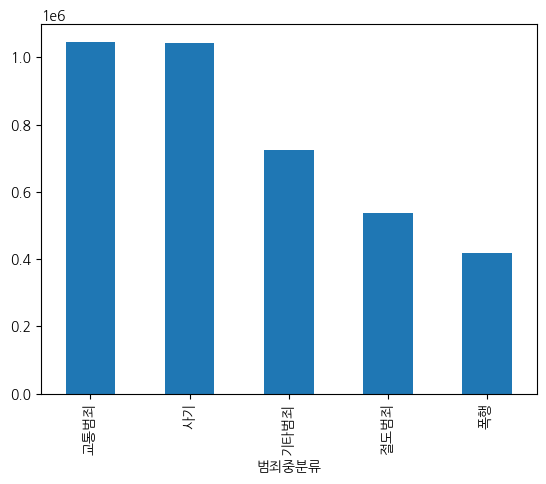

In [46]:
data_2020['전국'] = data_2020.iloc[:, 2:].sum(axis=1)
top_5_2020 = data_2020.nlargest(5, '전국')
top_5_2020 = top_5_2020.iloc[:, 1:]
top_5_2020 = top_5_2020.set_index(top_5_2020.iloc[:, 0])
top_5_2020['전국'].plot(kind='bar')

<Axes: xlabel='범죄중분류'>

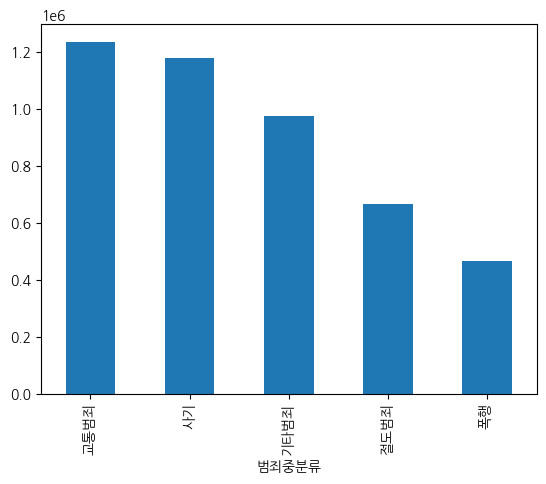

In [61]:
data_2021['전국'] = data_2021.iloc[:, 2:].sum(axis=1)
top_5_2021 = data_2021.nlargest(5, '전국')
top_5_2021 = top_5_2021.iloc[:, 1:]
top_5_2021 = top_5_2021.set_index(top_5_2021.iloc[:, 0])
top_5_2021['전국'].plot(kind='bar')

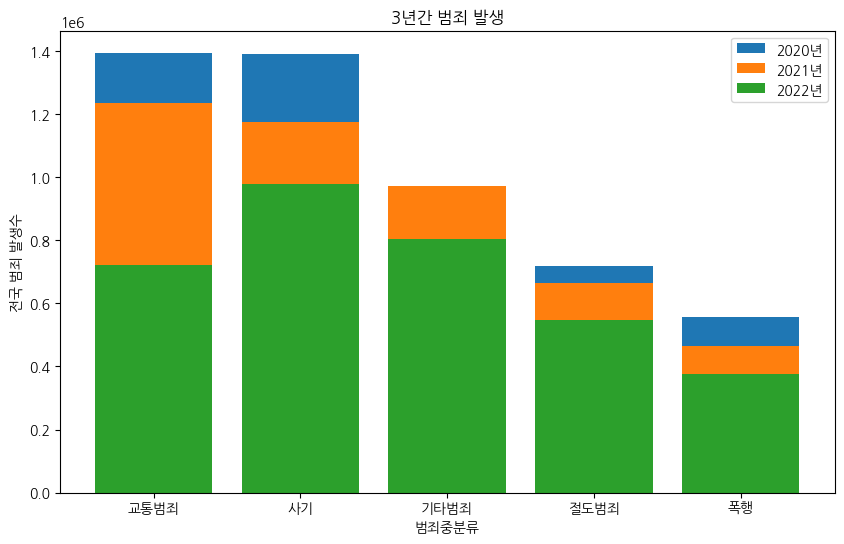

In [77]:
plt.figure(figsize=(10, 6))
# 각 연도별 데이터를 막대 그래프로 그리기
plt.bar(top_5_2020.index, top_5_2020['전국'], label='2020년')
plt.bar(top_5_2021.index, top_5_2021['전국'], label='2021년')
plt.bar(top_5_2022.index, top_5_2022['전국'], label='2022년')

# 그래프 제목 및 축 레이블 설정
plt.title('3년간 범죄 발생')
plt.xlabel('범죄중분류')
plt.ylabel('전국 범죄 발생수')

plt.legend()
plt.show()

3년(2022, 2021, 2020)동안의 데이터를 비교해보니 시간이 지날수록 점점 범죄 발생 수는 감소하고 있었습니다.

하지만 범죄유형별로 보면, 2020년과 2021년에는 '교통범죄'가 가장 많은 범죄 발생 유형이지만, 2022년에는 '사기' 범죄가 총 977,544건으로 가장 많이 발생한 범죄 유형임을 알 수 있었습니다.

따라서 저희는 감소한 '교통범죄'에 집중하여 '교통사고 발생률'과 연관된 데이터를 더 분석해 볼 예정입니다.